In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
# importing important lib

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# import tensorlfow libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# reading a csv file

file_path = 'learnbay/dataset/Churn_Modelling.csv'

data = pd.read_csv(file_path)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
x = data.iloc[: , 3:13]
y = data.iloc[: , 13]

In [ ]:
geography = pd.get_dummies(x['Geography'] , drop_first = True)
Gender = pd.get_dummies(x['Gender'] , drop_first = True)

In [ ]:
x['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
X = pd.concat([x, geography, Gender ] , axis = 1)
X.drop(columns = ['Geography' , 'Gender'] , inplace = True)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
# splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 101)

In [ ]:
# 1. create a structure - done
# 2. compile - done
# 3. run - 

In [ ]:
#  Creating a neural network structure

"""
units - number of neuron in hidden layer
hidden_layer = 3

"""

model = Sequential()

# adding the first hidden layer1
model.add(Dense(100 , activation = 'relu'))

# adding the first hidden layer2
model.add(Dense(50, activation = 'sigmoid'))

# adding the first hidden layer3
model.add(Dense(25, activation = 'relu'))

# adding the ouput layer
model.add(Dense(1 , activation='sigmoid'))


In [ ]:
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train , y_train, batch_size = 32 , epochs = 50 , validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5401 - accuracy: 0.7619 - val_loss: 0.4932 - val_accuracy: 0.8037
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7969 - val_loss: 0.4919 - val_accuracy: 0.8037
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7969 - val_loss: 0.4916 - val_accuracy: 0.8037
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7969 - val_loss: 0.4952 - val_accuracy: 0.8037
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7969 - val_loss: 0.4952 - val_accuracy: 0.8037
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7969 - val_loss: 0.4952 - val_accuracy: 0.8037
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7969 - val_loss: 0.4952 - val_accuracy: 0.8037
Epoch 

In [ ]:
# check if modekl is overfitting with graph
# optimzer
# epoch and batch_size
# save the model



In [ ]:
import matplotlib.pyplot as plt 

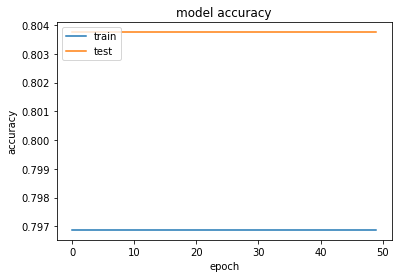

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

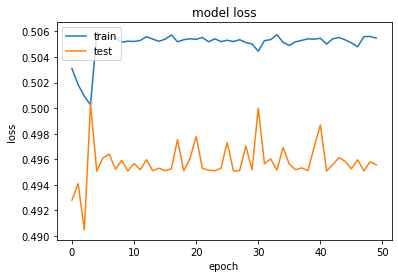

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(y_pred,y_test)
score

0.7885

In [ ]:
model.save('churn_modelling.h5')

In [ ]:
from tensorflow.keras import models

In [ ]:
test_model = models.load_model('churn_modelling.h5')